Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [10]:
NAME = "Jiwei Zeng"

---

# Exercise 02 - Due Friday, September 29 at 12pm


**Objectives**:  Gain experience loading a CSV dataset into a database and using SQL to explore its contents.  Write and execute a number of SQL queries using common syntax and functions.

**Grading criteria**: All code cells should be executed with outputs, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.

For this assignment, you need **not** add narrative description to most of your queries (except where explicitly noted), although you may do so if something you see in the data prompts you.  If you do, add new text cells and use Markdown formatting.

**Deadline**: Friday, September 29, 12pm.

**Suggestion**: if you have worked through the [Software Carpentry SQL lessons](http://swcarpentry.github.io/sql-novice-survey/) and have run through the last two lecture notes notebooks, this should all be fairly easy.  If you have done neither, do them now, before you begin.

# Part A (50 points)
Get the ```survey.db``` SQLite3 database file from the [Software Carpentry lesson](http://swcarpentry.github.io/sql-novice-survey/discussion.html) and connect to it.

In [2]:
!wget -O survey.db http://files.software-carpentry.org/survey.db

--2017-09-27 23:50:10--  http://files.software-carpentry.org/survey.db
Resolving files.software-carpentry.org (files.software-carpentry.org)... 162.209.59.183
Connecting to files.software-carpentry.org (files.software-carpentry.org)|162.209.59.183|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20480 (20K) [application/octet-stream]
Saving to: ‘survey.db’

survey.db           100%[===================>]  20.00K  --.-KB/s    in 0.02s   

2017-09-27 23:50:10 (923 KB/s) - ‘survey.db’ saved [20480/20480]



To work with it, we'll need the ipython-sql extension loaded, and then we'll need to connect to the db.

In [1]:
%load_ext sql

In [3]:
%sql sqlite:///survey.db

'Connected: None@survey.db'

First, take a look at the data in the tables:

In [3]:
%sql SELECT * FROM Site;

Done.


name,lat,long
DR-1,-49.85,-128.57
DR-3,-47.15,-126.72
MSK-4,-48.87,-123.4


In [4]:
%sql SELECT * FROM Visited;

Done.


ident,site,dated
619,DR-1,1927-02-08
622,DR-1,1927-02-10
734,DR-3,1939-01-07
735,DR-3,1930-01-12
751,DR-3,1930-02-26
752,DR-3,None
837,MSK-4,1932-01-14
844,DR-1,1932-03-22


In [5]:
%sql SELECT * FROM Person;

Done.


ident,personal,family
dyer,William,Dyer
pb,Frank,Pabodie
lake,Anderson,Lake
roe,Valentina,Roerich
danforth,Frank,Danforth


In [6]:
%sql SELECT * FROM Survey;

Done.


taken,person,quant,reading
619,dyer,rad,9.82
619,dyer,sal,0.13
622,dyer,rad,7.8
622,dyer,sal,0.09
734,pb,rad,8.41
734,lake,sal,0.05
734,pb,temp,-21.5
735,pb,rad,7.22
735,None,sal,0.06
735,None,temp,-26.0


### Question 1

Describe in your own words what the following query produces:
```
SELECT DISTINCT Site.name 
FROM Site 
JOIN Visited
    ON Site.lat < -49.0 
       AND Site.name = Visited.site 
       AND Visited.dated < '1932-01-01';
```

The following query looks for names of sites whose lattitute is less than -49.0 and visited date is less than 01-01-1932 and who also are visited, from the Site.

### Question 2
Write a query that lists all salinity readings that are out of range (the range should be between 0 and 1) and the persons who are responsible for those readings. The reasult should show name of the site, date of the site visit, the type of measurement taken and its reading, followed by personal name and family name of the person who took the measurement. Tip: you should get 2 records with 6 fields.

In [4]:
%%sql 
SELECT Visited.site, Visited.dated, Survey.quant,
       Survey.reading, Person.personal, Person.family
From Visited, Survey, Person
WHERE (Survey.reading > 1
or Survey.reading <0)
AND Survey.person = Person.ident
AND Survey.taken = Visited.ident
AND Survey.Quant = "sal";

Done.


site,dated,quant,reading,personal,family
DR-3,None,sal,41.6,Valentina,Roerich
MSK-4,1932-01-14,sal,22.5,Valentina,Roerich


### Question 3
After further investigation, we realize that Valentina Roerich was reporting salinity as percentages. Write a query that returns all of her original salinity readings, followed by the readings divided by 100. Use `ROUND` function to round the numbers to three decimal places. Rename these two attributes as "original_reading" and "corrected_reading". Tip: you should get 2 records.

In [10]:
%%sql
SELECT Survey.reading AS original_reading, Round(Survey.reading/100,3) AS corrected_reading
FROM Survey
WHERE Survey.person = "roe"
AND Survey.quant = "sal";

Done.


original_reading,corrected_reading
41.6,0.416
22.5,0.225


### Question 4
Once you are happy with the corrected salinity measurements from Valentina Roerich in the previous question, write one SQL UPDATE statement to correct all of her salinity measurements in the Survey table. For simplicity's sake, you can assume that all the out of range salinity readings were reported by her. Tip: you should see 2 rows updated.

In [11]:
%%sql
UPDATE Survey
SET reading = Round(reading/100,3)
WHERE Survey.person = "roe"
AND Survey.quant = "sal";

2 rows affected.


[]

Write a query that shows her salinity measurements have been fixed.

In [12]:
%%sql
SELECT person, reading
FROM Survey
WHERE person = "roe"
AND quant = "sal";

Done.


person,reading
roe,0.416
roe,0.225


### Question 5
Write a query that shows each site's name with exact location (lat, long), visted date ordered in ascending order, followed by personal name and family name of the person who visited the site and took the survey and the type of measurement taken and its reading. Please avoid all null values. Tip: you should get 15 records with 8 fields.

In [15]:
%%sql
SELECT Site.name, Site.lat, Site.long, Visited.dated, 
       Person.personal, Person.family, Survey.quant, Survey.reading
    From Site, Visited, Person, Survey
    WHERE Survey.person = Person.ident
    AND Survey.taken = Visited.ident
    AND Visited.site = Site.name
    AND Visited.dated !="None"
    ORDER BY Visited.dated ASC;

Done.


name,lat,long,dated,personal,family,quant,reading
DR-1,-49.85,-128.57,1927-02-08,William,Dyer,rad,9.82
DR-1,-49.85,-128.57,1927-02-08,William,Dyer,sal,0.13
DR-1,-49.85,-128.57,1927-02-10,William,Dyer,rad,7.8
DR-1,-49.85,-128.57,1927-02-10,William,Dyer,sal,0.09
DR-3,-47.15,-126.72,1930-01-12,Frank,Pabodie,rad,7.22
DR-3,-47.15,-126.72,1930-02-26,Anderson,Lake,sal,0.1
DR-3,-47.15,-126.72,1930-02-26,Frank,Pabodie,rad,4.35
DR-3,-47.15,-126.72,1930-02-26,Frank,Pabodie,temp,-18.5
MSK-4,-48.87,-123.4,1932-01-14,Anderson,Lake,rad,1.46
MSK-4,-48.87,-123.4,1932-01-14,Anderson,Lake,sal,0.21


# Part B (50 points)

In this part, we'll download a clean CSV dataset from data.gov, load it into a SQLite database, and perform a series of queries to answer several questions.  For each problem, write and execute queries that provides the answer in the cells provided, with your SQL queries in the places marked.  

## Setup - obtain data and create database

The [Connecticut DMV Boating Registrations](http://catalog.data.gov/dataset/dmv-boating-registrations-2008-to-2014) dataset comprises several years of summary records.  It is available from data.gov.

First we download the dataset:

In [16]:
!wget --quiet -O boating.csv "https://data.ct.gov/api/views/mrb6-7ee5/rows.csv?accessType=DOWNLOAD"

Verify that it's what we think it is on the commandline:

In [17]:
!head boating.csv | csvlook

|--------------+-----------------------------+---------------|
|  Fiscal Year | Type of Transactions        | No .of Boats  |
|--------------+-----------------------------+---------------|
|  2008        | BOAT CHANGE OF TYPE         | 59            |
|  2009        | BOAT CHANGE OF TYPE         | 50            |
|  2010        | BOAT CHANGE OF TYPE         | 21            |
|  2011        | BOAT CHANGE OF TYPE         | 41            |
|  2012        | BOAT CHANGE OF TYPE         | 16            |
|  2013        | BOAT CHANGE OF TYPE         | 27            |
|  2014        | BOAT CHANGE OF TYPE         | 54            |
|  2008        | BOAT RECORD XFER NO PROBATE | 6             |
|  2009        | BOAT RECORD XFER NO PROBATE | 12            |
|--------------+-----------------------------+---------------|


Looks right.  How many records are there?

In [18]:
!wc -l boating.csv

145 boating.csv


So that should be 145, counting the header.  And the basic stats:

In [19]:
!csvstat boating.csv

  1. Fiscal Year
	<class 'int'>
	Nulls: False
	Min: 2008
	Max: 2014
	Sum: 289578
	Mean: 2010.9583333333333
	Median: 2011.0
	Standard Deviation: 1.9960899278339177
	Unique values: 7
	5 most frequent values:
		2010:	21
		2011:	21
		2008:	21
		2009:	21
		2012:	20
  2. Type of Transactions
	<class 'str'>
	Nulls: False
	Unique values: 21
	5 most frequent values:
		RENEW BOAT USCG AUX EXEMPT:	7
		BOAT REG, CANOE:	7
		BOAT REG, PONTOON:	7
		RENEW BOAT MILTRY PERSONNEL EXMP:	7
		RENEW BOAT EDUCATIONAL:	7
	Max length: 32
  3. No .of Boats
	<class 'int'>
	Nulls: False
	Min: 0
	Max: 95270
	Sum: 767584
	Mean: 5330.444444444444
	Median: 43.5
	Standard Deviation: 19683.78413284855
	Unique values: 96
	5 most frequent values:
		2:	9
		21:	4
		0:	4
		19:	4
		16:	4

Row count: 144


Looks about right!  

Note, though, that the column names have spaces, punctuation, and Upper Cased Names.  That's annoying!  First let's rename the file.

In [20]:
!mv boating.csv boating-orig.csv

Okay, using output redirection and `tail` we can write a new header line.

In [21]:
!echo "year,tx_type,num" > boating.csv

In [23]:
!tail -n +2 boating-orig.csv >> boating.csv

In [25]:
!head boating.csv | csvlook

|-------+-----------------------------+------|
|  year | tx_type                     | num  |
|-------+-----------------------------+------|
|  2008 | BOAT CHANGE OF TYPE         | 59   |
|  2009 | BOAT CHANGE OF TYPE         | 50   |
|  2010 | BOAT CHANGE OF TYPE         | 21   |
|  2011 | BOAT CHANGE OF TYPE         | 41   |
|  2012 | BOAT CHANGE OF TYPE         | 16   |
|  2013 | BOAT CHANGE OF TYPE         | 27   |
|  2014 | BOAT CHANGE OF TYPE         | 54   |
|  2008 | BOAT RECORD XFER NO PROBATE | 6    |
|  2009 | BOAT RECORD XFER NO PROBATE | 12   |
|-------+-----------------------------+------|


Much easier to work with now.

Next we convert the updated csv file into a SQLite database using CSVkit. First we remove the database file if it exists, so that we can do it repeatedly.

In [26]:
!rm -f boating.db

In [27]:
!csvsql --db sqlite:///boating.db --insert boating.csv

Now connect to the newly created database. If you get an error here, make sure file `boating.db` exists, and ipython-sql extension is loaded. You've loaded ipython-sql extension in Part A. 

In [2]:
%sql sqlite:///boating.db

'Connected: None@boating.db'

In [29]:
%%sql
SELECT COUNT(*)
FROM boating;

Done.


COUNT(*)
144


Looks like the same number of rows!  We're good to go.

## Basic queries

In the following queries, we'll do some basic exploration of the data.  Let's first see what a few records look like.

In [30]:
%%sql
SELECT *
FROM boating
LIMIT 10;

Done.


year,tx_type,num
2008,BOAT CHANGE OF TYPE,59
2009,BOAT CHANGE OF TYPE,50
2010,BOAT CHANGE OF TYPE,21
2011,BOAT CHANGE OF TYPE,41
2012,BOAT CHANGE OF TYPE,16
2013,BOAT CHANGE OF TYPE,27
2014,BOAT CHANGE OF TYPE,54
2008,BOAT RECORD XFER NO PROBATE,6
2009,BOAT RECORD XFER NO PROBATE,12
2010,BOAT RECORD XFER NO PROBATE,15


This should look familiar!

Let's look at just the "change" types.

In [31]:
%%sql
SELECT *
FROM boating
WHERE tx_type = "BOAT CHANGE OF TYPE";

Done.


year,tx_type,num
2008,BOAT CHANGE OF TYPE,59
2009,BOAT CHANGE OF TYPE,50
2010,BOAT CHANGE OF TYPE,21
2011,BOAT CHANGE OF TYPE,41
2012,BOAT CHANGE OF TYPE,16
2013,BOAT CHANGE OF TYPE,27
2014,BOAT CHANGE OF TYPE,54


How many records do we have here, and which year had the most?

In [32]:
%%sql
SELECT COUNT(*)
FROM boating
WHERE tx_type = "BOAT CHANGE OF TYPE";

Done.


COUNT(*)
7


Which year had the most of these transactions?

In [33]:
%%sql
SELECT *
FROM boating
WHERE tx_type = "BOAT CHANGE OF TYPE"
ORDER BY num DESC;

Done.


year,tx_type,num
2008,BOAT CHANGE OF TYPE,59
2014,BOAT CHANGE OF TYPE,54
2009,BOAT CHANGE OF TYPE,50
2011,BOAT CHANGE OF TYPE,41
2013,BOAT CHANGE OF TYPE,27
2010,BOAT CHANGE OF TYPE,21
2012,BOAT CHANGE OF TYPE,16


...alright, your turn. Before we start, we need to understand the terminology used here: A _record_ refers to a row in our table, it is a summarized record; A _transaction_ refers to registration of an individual boat.  

### Question 6

Use `DISTINCT` to determine the unique set of transaction types in this dataset. Tip: you should get 21 records.

In [34]:
%%sql
SELECT DISTINCT tx_type
FROM boating;

Done.


tx_type
BOAT CHANGE OF TYPE
BOAT RECORD XFER NO PROBATE
BOAT REG ST OF CONNECTICUT
"BOAT REG, CANOE"
"BOAT REG, COMM FISHING"
"BOAT REG, EDUCATIONAL"
"BOAT REG, NEW"
"BOAT REG, NON-PROFIT"
"BOAT REG, PONTOON"
"BOAT, DUPLICATE REGISTRATION"


### Question 7

Use `SUM` and `GROUP BY` to determine the overall number of transactions (across all years) per transaction type.

In [35]:
%%sql
SELECT tx_type, SUM(num) AS sum_tx
FROM boating
GROUP BY tx_type;

Done.


tx_type,sum_tx
BOAT CHANGE OF TYPE,268
BOAT RECORD XFER NO PROBATE,105
BOAT REG ST OF CONNECTICUT,159
"BOAT REG, CANOE",1129
"BOAT REG, COMM FISHING",114
"BOAT REG, EDUCATIONAL",15
"BOAT REG, NEW",86821
"BOAT REG, NON-PROFIT",106
"BOAT REG, PONTOON",2241
"BOAT, DUPLICATE REGISTRATION",2390


### Question 8

Use `ORDER BY` and `LIMIT` to determine the top five types of transactions overall.

In [39]:
%%sql
SELECT tx_type, SUM(num) AS sum_tx
FROM boating
GROUP BY tx_type
ORDER BY sum_tx DESC
LIMIT 5;

Done.


tx_type,sum_tx
REN BOAT REGISTRATION,640790
"BOAT REG, NEW",86821
REN BOAT PONTOON,15556
RENEW BOAT CANOE,14551
"BOAT, DUPLICATE REGISTRATION",2390


### Question 9

Use a wildcard search to determine how many _transactions_ in 2012 involve canoes?

In [41]:
%%sql
SELECT *
FROM Boating
WHERE year = 2012
AND tx_type LIKE "%canoe%";

Done.


year,tx_type,num
2012,"BOAT REG, CANOE",151
2012,RENEW BOAT CANOE,1982


### Question 10

How do the transaction trends over time involving pontoons compare to overall boating transaction activity?  Discuss as appropriate, adding Markdown cells for your discussion after your exploratory queries.

In [43]:
%%sql
SELECT *
FROM Boating
WHERE tx_type LIKE "%pontoon%";

Done.


year,tx_type,num
2008,"BOAT REG, PONTOON",321
2009,"BOAT REG, PONTOON",282
2010,"BOAT REG, PONTOON",292
2011,"BOAT REG, PONTOON",309
2012,"BOAT REG, PONTOON",363
2013,"BOAT REG, PONTOON",351
2014,"BOAT REG, PONTOON",323
2008,REN BOAT PONTOON,1962
2009,REN BOAT PONTOON,2068
2010,REN BOAT PONTOON,2118


In [44]:
%%sql
SELECT *
FROM Boating
WHERE tx_type = "REN BOAT REGISTRATION";

Done.


year,tx_type,num
2008,REN BOAT REGISTRATION,95156
2009,REN BOAT REGISTRATION,95270
2010,REN BOAT REGISTRATION,94005
2011,REN BOAT REGISTRATION,92175
2012,REN BOAT REGISTRATION,89847
2013,REN BOAT REGISTRATION,88042
2014,REN BOAT REGISTRATION,86295


According to the data above, we can know that the number of transaction involving pontoons is increasing, while the number of is decreasing, which means that pontoons become more attractive to customer and performs better in the renting market.

### Bonus (10 points)

Make a plot (inline, here, using python) that demonstrates one or more overall trends in boat registrations in Connecticut, drawing data directly from the database.

In [3]:
%matplotlib inline

In [4]:
%%sql
SELECT *
FROM Boating
WHERE tx_type = "REN BOAT REGISTRATION";

Done.


year,tx_type,num
2008,REN BOAT REGISTRATION,95156
2009,REN BOAT REGISTRATION,95270
2010,REN BOAT REGISTRATION,94005
2011,REN BOAT REGISTRATION,92175
2012,REN BOAT REGISTRATION,89847
2013,REN BOAT REGISTRATION,88042
2014,REN BOAT REGISTRATION,86295


<Container object of 7 artists>

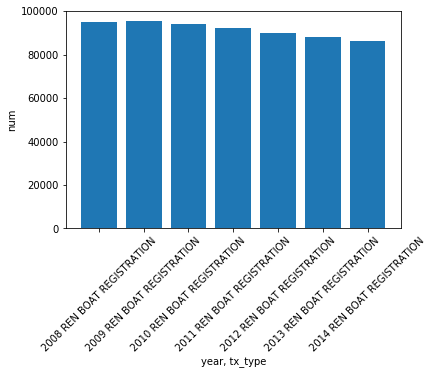

In [5]:
result = _
result.bar()